<div style="text-align: center; font-size: 28px;">
<b><i> Atenuación de fotones </i></b>
</div>

<div style="height: 10px;"></div>

<div style="text-align: center; font-size: 22px;">
<i> Olivia Zantleifer </i>
</div>

<div style="text-align: center; 22px">
<i><a href="mailto:ozantleifer@estudiantes.unsam.edu.ar">ozantleifer@estudiantes.unsam.edu.ar</a></i>
</div>

<div style="height: 10px;"></div>

<div style="text-align: center; font-size: 18px;">
<i> Física de las radiaciones - 2do cuatrimestre 2024 </i>
</div>

<div style="text-align: center; font-size: 18px;">
<i> Escuela de Ciencia y Tecnología, Universidad Nacional de San Martín </i>
</div>

<div style="text-align: justify; font-size: 14px;">
En este trabajo se estudió la atenuación de los fotones al atravesar atenuadores de diferentes es espesores. El objetivo fue estimar los
coeficientes de atenuación lineales para fotones de distintas energías y compararlos con los valores tabulados. 
</div>
#TODO : EXPONER RESULTADOS

<div style="font-size: 18px;">
<b>Introducción</b>
</div>
<div style="text-align: justify; font-size: 15px;">
Los fotones interactuan con la materia de diferentes formas dependiendo de su energía incidente y del Z del material con el que interactuan. La forma en la que interactuan determina cuanta energía le entregan a los electrones del medio y por lo tanto que pasa con estos fotones.<br>
En casos de bajas energías y de altos Z, predomina absorción fotoelectrica. En esta interacción los fotones transmiten toda su energía a los electrones con los que interactuan.<br>
<br>
La intensidad de radiación transmitida I se calcula de la siguiente forma: <br>

$$
\begin{align}\tag{1}
%\begin{ecuation}
I = I_0 \cdot \exp(-\mu x)
\end{align}
$$

donde $x$ es el espesor del atenuador, $I_0$ la intensidad de radiación incidente y $\mu$ es el coeficiente de atenuación lineal.

$$
\begin{align}\tag{2}
\mu = \tau + \sigma_R + \sigma_C + \kappa
\end{align}
$$


</div>






<div style="font-size: 18px;">
<b>Desarrollo experimental</b>
</div>
<div style="text-align: justify; font-size: 15px;">
En este experimento se utilizó &nbsp;<sup>241</sup>Am como fuente de fotones. Debido a que este isótopo tiene un núcleo inestable, este se desintegra en &nbsp;<sup>237</sup>Np y <sup>4</sup>He liberando también radiación &gamma; y &alpha;.<br>
Luego la intensidad fue medida con un detector. Este detector de CdTe tiene conectado un circuito que genera un pulso electrónico cuya altura es proporcional a la energía depositada. El sistema electrónico conectado genera un espectro, es decir, una especie de histograma que va contando la cantidad de fotones que producen los distintos pulsos. Entre medio del detector y de la fuente de fotones se fueron colocando los atenuadores de distintos espesores.<br>
En primer lugar se midió la intensidad de radiación transmititida sin colocar ningun atenuador. Los valores obtenidos se asociaron a I0 . Luego se fueron colocando los distintos atenuadores y se fue observando el espectro. 

</div>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import xraydb as xr

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [10, 8]

In [21]:
df_PMMA = pd.read_csv(r"C:\Users\Oli\Documents\unsam\fisica de las radiaciones\laboratorio\atenuacion_de_fotones\Datos_PMMA.csv")
df_PMMA

,Espectro,Espesor_de_atenuador_[mm],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg
0,Am241_0mm.mca,0.0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120.0
1,Am241_50mm_PMMA_1.mca,50.8,267.86,3583,0.0227,139,NaN,46,NaN,NaN
2,Am241_8mm_PMMA_2.mca,8.0,323.08,8203,0.0128,487,0.0862,1096,0.0459,94.0
3,Am241_2mm_PMMA_2.mca,2.0,278.67,7537,0.0133,464,0.0673,1943,0.0273,105.0
4,Am241_10mm_PMMA.mca,10.0,372.28,9473,0.0120,571,0.0793,1243,0.0409,93.0
5,Am241_10mm_PMMA_2.mca,10.0,460.85,11389,0.0115,631,0.0956,1135,0.0395,90.0
6,Am241_12mm_PMMA.mca,12.0,380.12,9326,0.0118,525,0.0787,702,0.0475,87.0
7,Am241_18mm_PMMA.mca,18.0,505.29,11112,0.0108,587,0.1238,436,0.0869,81.0
8,Am241_20mm_PMMA.mca,20.0,407.70,8635,0.0132,409,0.1191,312,0.0981,79.0


In [22]:
df_PMMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Espectro                   9 non-null      object 
 1   Espesor_de_atenuador_[mm]  9 non-null      float64
 2   Tiempo_de_medicion_[seg]   9 non-null      float64
 3   Cant_de_fotones_60_keV     9 non-null      int64  
 4   Error_60_keV               9 non-null      float64
 5   Cant_de_fotones_26_keV     9 non-null      int64  
 6   Error_26_keV               8 non-null      float64
 7   Cant_de_fotones_14_keV     9 non-null      int64  
 8   Error_14_keV               8 non-null      float64
 9   Cuentas_por_seg            8 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 852.0+ bytes


In [24]:
df_PMMA['I_60'] = df_PMMA['Cant_de_fotones_60_keV']/df_PMMA['Tiempo_de_medicion_[seg]']
df_PMMA['I_26'] = df_PMMA['Cant_de_fotones_26_keV']/df_PMMA['Tiempo_de_medicion_[seg]']
df_PMMA['I_14'] = df_PMMA['Cant_de_fotones_14_keV']/df_PMMA['Tiempo_de_medicion_[seg]']
df_PMMA

,Espectro,Espesor_de_atenuador_[mm],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14
0,Am241_0mm.mca,0.0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120.0,28.914461,1.778073,9.609073
1,Am241_50mm_PMMA_1.mca,50.8,267.86,3583,0.0227,139,NaN,46,NaN,NaN,13.376391,0.518928,0.171732
2,Am241_8mm_PMMA_2.mca,8.0,323.08,8203,0.0128,487,0.0862,1096,0.0459,94.0,25.389996,1.507367,3.392349
3,Am241_2mm_PMMA_2.mca,2.0,278.67,7537,0.0133,464,0.0673,1943,0.0273,105.0,27.046327,1.665052,6.972405
4,Am241_10mm_PMMA.mca,10.0,372.28,9473,0.0120,571,0.0793,1243,0.0409,93.0,25.445901,1.533792,3.338885
5,Am241_10mm_PMMA_2.mca,10.0,460.85,11389,0.0115,631,0.0956,1135,0.0395,90.0,24.713030,1.369209,2.462840
6,Am241_12mm_PMMA.mca,12.0,380.12,9326,0.0118,525,0.0787,702,0.0475,87.0,24.534358,1.381143,1.846785
7,Am241_18mm_PMMA.mca,18.0,505.29,11112,0.0108,587,0.1238,436,0.0869,81.0,21.991332,1.161709,0.862871
8,Am241_20mm_PMMA.mca,20.0,407.70,8635,0.0132,409,0.1191,312,0.0981,79.0,21.179789,1.003189,0.765269


In [25]:
df_PMMA['ln(I_60/I0_60)'] = np.log(df_PMMA['I_60']/df_PMMA['I_60'][0])
df_PMMA['ln(I_26/I0_26)'] = np.log(df_PMMA['I_26']/df_PMMA['I_26'][0])
df_PMMA['ln(I_14/I0_14)'] = np.log(df_PMMA['I_14']/df_PMMA['I_14'][0])
df_PMMA = df_PMMA.drop(4)
df_PMMA

,Espectro,Espesor_de_atenuador_[mm],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14,ln(I_60/I0_60),ln(I_26/I0_26),ln(I_14/I0_14)
0,Am241_0mm.mca,0.0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120.0,28.914461,1.778073,9.609073,0.000000,0.000000,0.000000
1,Am241_50mm_PMMA_1.mca,50.8,267.86,3583,0.0227,139,NaN,46,NaN,NaN,13.376391,0.518928,0.171732,-0.770851,-1.231521,-4.024531
2,Am241_8mm_PMMA_2.mca,8.0,323.08,8203,0.0128,487,0.0862,1096,0.0459,94.0,25.389996,1.507367,3.392349,-0.129987,-0.165166,-1.041185
3,Am241_2mm_PMMA_2.mca,2.0,278.67,7537,0.0133,464,0.0673,1943,0.0273,105.0,27.046327,1.665052,6.972405,-0.066791,-0.065674,-0.320748
5,Am241_10mm_PMMA_2.mca,10.0,460.85,11389,0.0115,631,0.0956,1135,0.0395,90.0,24.713030,1.369209,2.462840,-0.157011,-0.261297,-1.361392
6,Am241_12mm_PMMA.mca,12.0,380.12,9326,0.0118,525,0.0787,702,0.0475,87.0,24.534358,1.381143,1.846785,-0.164267,-0.252619,-1.649261
7,Am241_18mm_PMMA.mca,18.0,505.29,11112,0.0108,587,0.1238,436,0.0869,81.0,21.991332,1.161709,0.862871,-0.273694,-0.425638,-2.410198
8,Am241_20mm_PMMA.mca,20.0,407.70,8635,0.0132,409,0.1191,312,0.0981,79.0,21.179789,1.003189,0.765269,-0.311294,-0.572347,-2.530236


In [26]:
df_PMMA = df_PMMA.drop(1)
df_PMMA

,Espectro,Espesor_de_atenuador_[mm],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14,ln(I_60/I0_60),ln(I_26/I0_26),ln(I_14/I0_14)
0,Am241_0mm.mca,0.0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120.0,28.914461,1.778073,9.609073,0.000000,0.000000,0.000000
2,Am241_8mm_PMMA_2.mca,8.0,323.08,8203,0.0128,487,0.0862,1096,0.0459,94.0,25.389996,1.507367,3.392349,-0.129987,-0.165166,-1.041185
3,Am241_2mm_PMMA_2.mca,2.0,278.67,7537,0.0133,464,0.0673,1943,0.0273,105.0,27.046327,1.665052,6.972405,-0.066791,-0.065674,-0.320748
5,Am241_10mm_PMMA_2.mca,10.0,460.85,11389,0.0115,631,0.0956,1135,0.0395,90.0,24.713030,1.369209,2.462840,-0.157011,-0.261297,-1.361392
6,Am241_12mm_PMMA.mca,12.0,380.12,9326,0.0118,525,0.0787,702,0.0475,87.0,24.534358,1.381143,1.846785,-0.164267,-0.252619,-1.649261
7,Am241_18mm_PMMA.mca,18.0,505.29,11112,0.0108,587,0.1238,436,0.0869,81.0,21.991332,1.161709,0.862871,-0.273694,-0.425638,-2.410198
8,Am241_20mm_PMMA.mca,20.0,407.70,8635,0.0132,409,0.1191,312,0.0981,79.0,21.179789,1.003189,0.765269,-0.311294,-0.572347,-2.530236


In [27]:
df_PMMA['E_I_60_keV'] = df_PMMA['Error_60_keV']/df_PMMA['I_60'] 
df_PMMA['E_I_26_keV'] = df_PMMA['Error_26_keV']/df_PMMA['I_26']
df_PMMA['E_I_14_keV'] = df_PMMA['Error_14_keV']/df_PMMA['I_14']
df_PMMA

,Espectro,Espesor_de_atenuador_[mm],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14,ln(I_60/I0_60),ln(I_26/I0_26),ln(I_14/I0_14),E_I_60_keV,E_I_26_keV,E_I_14_keV
0,Am241_0mm.mca,0.0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120.0,28.914461,1.778073,9.609073,0.000000,0.000000,0.000000,0.000429,0.038244,0.002810
2,Am241_8mm_PMMA_2.mca,8.0,323.08,8203,0.0128,487,0.0862,1096,0.0459,94.0,25.389996,1.507367,3.392349,-0.129987,-0.165166,-1.041185,0.000504,0.057186,0.013530
3,Am241_2mm_PMMA_2.mca,2.0,278.67,7537,0.0133,464,0.0673,1943,0.0273,105.0,27.046327,1.665052,6.972405,-0.066791,-0.065674,-0.320748,0.000492,0.040419,0.003915
5,Am241_10mm_PMMA_2.mca,10.0,460.85,11389,0.0115,631,0.0956,1135,0.0395,90.0,24.713030,1.369209,2.462840,-0.157011,-0.261297,-1.361392,0.000465,0.069821,0.016038
6,Am241_12mm_PMMA.mca,12.0,380.12,9326,0.0118,525,0.0787,702,0.0475,87.0,24.534358,1.381143,1.846785,-0.164267,-0.252619,-1.649261,0.000481,0.056982,0.025720
7,Am241_18mm_PMMA.mca,18.0,505.29,11112,0.0108,587,0.1238,436,0.0869,81.0,21.991332,1.161709,0.862871,-0.273694,-0.425638,-2.410198,0.000491,0.106567,0.100710
8,Am241_20mm_PMMA.mca,20.0,407.70,8635,0.0132,409,0.1191,312,0.0981,79.0,21.179789,1.003189,0.765269,-0.311294,-0.572347,-2.530236,0.000623,0.118721,0.128190


In [28]:
modelo_lineal_60 = LinearRegression()
X = np.array(df_PMMA['Espesor_de_atenuador_[mm]']).reshape(-1,1) 
modelo_lineal_60.fit(X,df_PMMA['ln(I_60/I0_60)'])
y_pred_60 = modelo_lineal_60.predict(X)
mu_60 = modelo_lineal_60.coef_
intercept_60 = modelo_lineal_60.intercept_

print(f'La curva ajustada para el PMMA con una energía incidente de 60 keV es: {mu_60[0]:.4f} * x + {intercept_60:.4f}')

La curva ajustada para el PMMA con una energía incidente de 60 keV es: -0.0144 * x + -0.0136


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


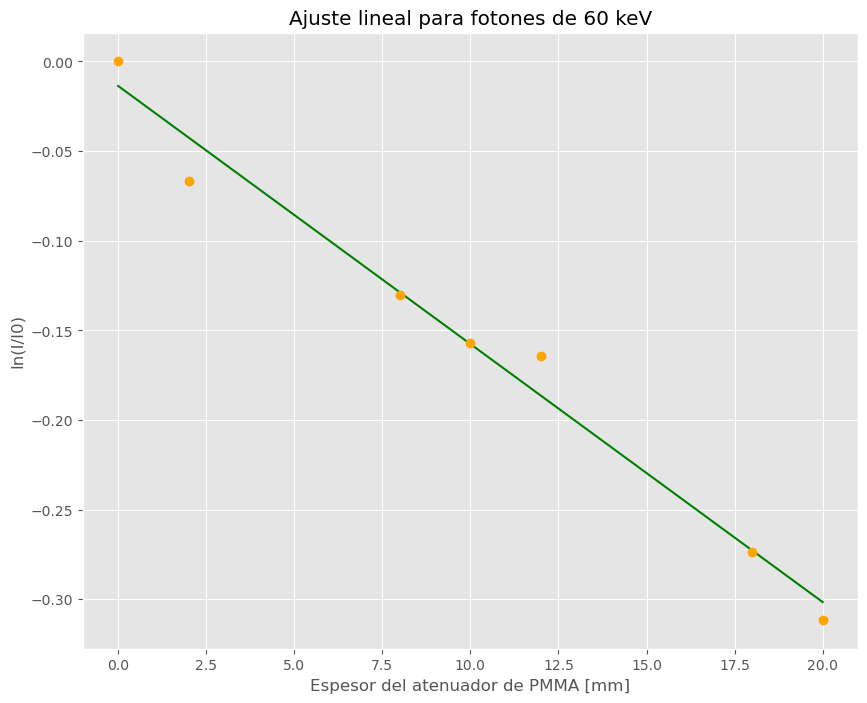

In [29]:
plt.errorbar(x = df_PMMA['Espesor_de_atenuador_[mm]'], y = df_PMMA['ln(I_60/I0_60)'], yerr = df_PMMA['E_I_60_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.lineplot(data = df_PMMA, x = df_PMMA['Espesor_de_atenuador_[mm]'],  y = y_pred_60, color = 'green')
plt.title('Ajuste lineal para fotones de 60 keV')
plt.xlabel('Espesor del atenuador de PMMA [mm]')
plt.ylabel('ln(I/I0)')
plt.show()

In [30]:
modelo_lineal_26 = LinearRegression()
X = np.array(df_PMMA['Espesor_de_atenuador_[mm]']).reshape(-1,1) 
modelo_lineal_26.fit(X,df_PMMA['ln(I_26/I0_26)'])
y_pred_26 = modelo_lineal_26.predict(X)
mu_26 = modelo_lineal_26.coef_
intercept_26 = modelo_lineal_26.intercept_

print(f'La curva ajustada para el PMMA con una energía incidente de 26 keV es: {mu_26[0]:.4f} * x + {intercept_26:.4f}')

La curva ajustada para el PMMA con una energía incidente de 26 keV es: -0.0261 * x + 0.0123


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


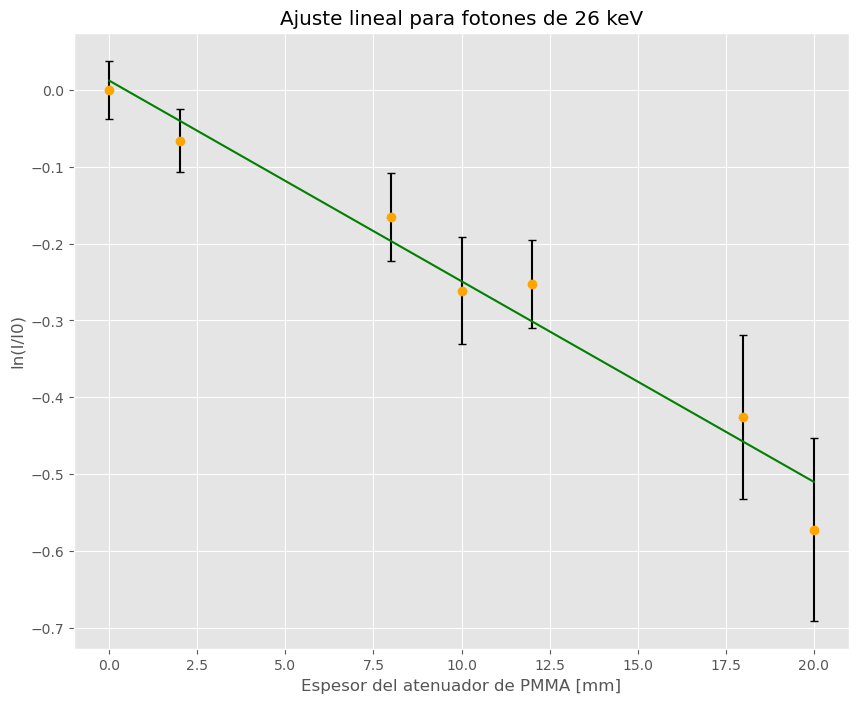

In [31]:
plt.errorbar(x = df_PMMA['Espesor_de_atenuador_[mm]'], y = df_PMMA['ln(I_26/I0_26)'], yerr = df_PMMA['E_I_26_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.scatterplot(data = df_PMMA, x = df_PMMA['Espesor_de_atenuador_[mm]'] , y = df_PMMA['ln(I_26/I0_26)'], color = 'orange')
sns.lineplot(data = df_PMMA, x = df_PMMA['Espesor_de_atenuador_[mm]'],  y = y_pred_26, color = 'green')
plt.title('Ajuste lineal para fotones de 26 keV')
plt.xlabel('Espesor del atenuador de PMMA [mm]')
plt.ylabel('ln(I/I0)')
plt.show()

In [32]:
modelo_lineal_14 = LinearRegression()
X = np.array(df_PMMA['Espesor_de_atenuador_[mm]']).reshape(-1,1) 
modelo_lineal_14.fit(X,df_PMMA['ln(I_14/I0_14)'])
y_pred_14 = modelo_lineal_14.predict(X)
mu_14 = modelo_lineal_14.coef_
intercept_14 = modelo_lineal_14.intercept_

print(f'La curva ajustada para el PMMA con una energía incidente de 14 keV es: {mu_14[0]:.4f} * x + {intercept_14:.4f}')

La curva ajustada para el PMMA con una energía incidente de 14 keV es: -0.1287 * x + -0.0437


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


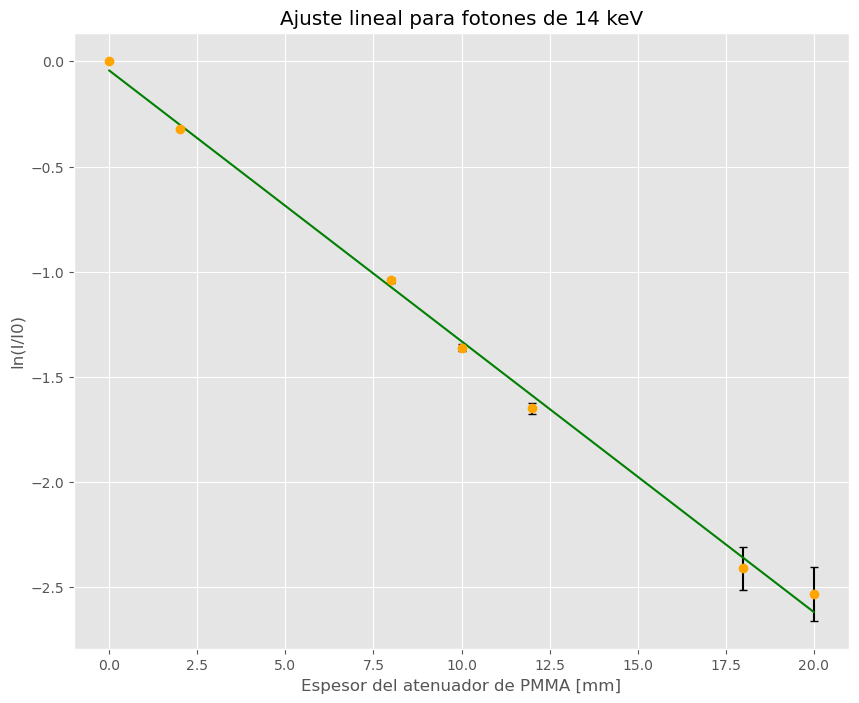

In [33]:
plt.errorbar(x = df_PMMA['Espesor_de_atenuador_[mm]'], y = df_PMMA['ln(I_14/I0_14)'], yerr = df_PMMA['E_I_14_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.scatterplot(data = df_PMMA, x = df_PMMA['Espesor_de_atenuador_[mm]'] , y = df_PMMA['ln(I_14/I0_14)'], color = 'orange')
sns.lineplot(data = df_PMMA, x = df_PMMA['Espesor_de_atenuador_[mm]'],  y = y_pred_14, color = 'green')
plt.title('Ajuste lineal para fotones de 14 keV')
plt.xlabel('Espesor del atenuador de PMMA [mm]')
plt.ylabel('ln(I/I0)')
plt.show()

In [55]:
df_Polietileno = pd.read_csv(r"C:\Users\Oli\Documents\unsam\fisica de las radiaciones\laboratorio\atenuacion_de_fotones\Datos_Polietileno.csv")
df_Polietileno

,Espectro,Espesor_de_atenuador_[um],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg
0,Am241_0mm.mca,0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120
1,AM241_100um_Polietileno.mca,100,278.68,7911,0.0126,540,0.0852,2666,0.0239,111
2,AM241_200um_Polietileno.mca,200,259.06,7234,0.0139,465,0.0803,2407,0.0277,110
3,AM241_400um_Polietileno.mca,400,231.44,6570,0.0142,403,0.0632,2079,0.0271,109
4,AM241_300um_Polietileno.mca,300,280.68,8214,0.0126,568,0.0798,2516,0.0271,111
5,AM241_800um_Polietileno.mca,800,231.41,6528,0.0129,404,0.1114,2018,0.0271,108


In [56]:
df_Polietileno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Espectro                   6 non-null      object 
 1   Espesor_de_atenuador_[um]  6 non-null      int64  
 2   Tiempo_de_medicion_[seg]   6 non-null      float64
 3   Cant_de_fotones_60_keV     6 non-null      int64  
 4   Error_60_keV               6 non-null      float64
 5   Cant_de_fotones_26_keV     6 non-null      int64  
 6   Error_26_keV               6 non-null      float64
 7   Cant_de_fotones_14_keV     6 non-null      int64  
 8   Error_14_keV               6 non-null      float64
 9   Cuentas_por_seg            6 non-null      int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 612.0+ bytes


In [57]:
df_Polietileno['I_60'] = df_Polietileno['Cant_de_fotones_60_keV']/df_Polietileno['Tiempo_de_medicion_[seg]']
df_Polietileno['I_26'] = df_Polietileno['Cant_de_fotones_26_keV']/df_Polietileno['Tiempo_de_medicion_[seg]']
df_Polietileno['I_14'] = df_Polietileno['Cant_de_fotones_14_keV']/df_Polietileno['Tiempo_de_medicion_[seg]']
df_Polietileno

,Espectro,Espesor_de_atenuador_[um],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14
0,Am241_0mm.mca,0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120,28.914461,1.778073,9.609073
1,AM241_100um_Polietileno.mca,100,278.68,7911,0.0126,540,0.0852,2666,0.0239,111,28.387398,1.937706,9.566528
2,AM241_200um_Polietileno.mca,200,259.06,7234,0.0139,465,0.0803,2407,0.0277,110,27.924033,1.794951,9.291284
3,AM241_400um_Polietileno.mca,400,231.44,6570,0.0142,403,0.0632,2079,0.0271,109,28.387487,1.741272,8.982890
4,AM241_300um_Polietileno.mca,300,280.68,8214,0.0126,568,0.0798,2516,0.0271,111,29.264643,2.023657,8.963945
5,AM241_800um_Polietileno.mca,800,231.41,6528,0.0129,404,0.1114,2018,0.0271,108,28.209671,1.745819,8.720453


In [59]:
df_Polietileno['ln(I_60/I0_60)'] = np.log(df_Polietileno['I_60']/df_Polietileno['I_60'][0])
df_Polietileno['ln(I_26/I0_26)'] = np.log(df_Polietileno['I_26']/df_Polietileno['I_26'][0])
df_Polietileno['ln(I_14/I0_14)'] = np.log(df_Polietileno['I_14']/df_Polietileno['I_14'][0])
df_Polietileno

,Espectro,Espesor_de_atenuador_[um],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14,ln(I_60/I0_60),ln(I_26/I0_26),ln(I_14/I0_14)
0,Am241_0mm.mca,0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120,28.914461,1.778073,9.609073,0.000000,0.000000,0.000000
1,AM241_100um_Polietileno.mca,100,278.68,7911,0.0126,540,0.0852,2666,0.0239,111,28.387398,1.937706,9.566528,-0.018397,0.085975,-0.004437
2,AM241_200um_Polietileno.mca,200,259.06,7234,0.0139,465,0.0803,2407,0.0277,110,27.924033,1.794951,9.291284,-0.034854,0.009447,-0.033631
3,AM241_400um_Polietileno.mca,400,231.44,6570,0.0142,403,0.0632,2079,0.0271,109,28.387487,1.741272,8.982890,-0.018393,-0.020914,-0.067386
4,AM241_300um_Polietileno.mca,300,280.68,8214,0.0126,568,0.0798,2516,0.0271,111,29.264643,2.023657,8.963945,0.012038,0.129376,-0.069497
5,AM241_800um_Polietileno.mca,800,231.41,6528,0.0129,404,0.1114,2018,0.0271,108,28.209671,1.745819,8.720453,-0.024677,-0.018306,-0.097037


In [60]:
df_Polietileno['E_I_60_keV'] = df_Polietileno['Error_60_keV']/df_Polietileno['I_60'] 
df_Polietileno['E_I_26_keV'] = df_Polietileno['Error_26_keV']/df_Polietileno['I_26']
df_Polietileno['E_I_14_keV'] = df_Polietileno['Error_14_keV']/df_Polietileno['I_14']
df_Polietileno

,Espectro,Espesor_de_atenuador_[um],Tiempo_de_medicion_[seg],Cant_de_fotones_60_keV,Error_60_keV,Cant_de_fotones_26_keV,Error_26_keV,Cant_de_fotones_14_keV,Error_14_keV,Cuentas_por_seg,I_60,I_26,I_14,ln(I_60/I0_60),ln(I_26/I0_26),ln(I_14/I0_14),E_I_60_keV,E_I_26_keV,E_I_14_keV
0,Am241_0mm.mca,0,240.71,6960,0.0124,428,0.0680,2313,0.0270,120,28.914461,1.778073,9.609073,0.000000,0.000000,0.000000,0.000429,0.038244,0.002810
1,AM241_100um_Polietileno.mca,100,278.68,7911,0.0126,540,0.0852,2666,0.0239,111,28.387398,1.937706,9.566528,-0.018397,0.085975,-0.004437,0.000444,0.043970,0.002498
2,AM241_200um_Polietileno.mca,200,259.06,7234,0.0139,465,0.0803,2407,0.0277,110,27.924033,1.794951,9.291284,-0.034854,0.009447,-0.033631,0.000498,0.044737,0.002981
3,AM241_400um_Polietileno.mca,400,231.44,6570,0.0142,403,0.0632,2079,0.0271,109,28.387487,1.741272,8.982890,-0.018393,-0.020914,-0.067386,0.000500,0.036295,0.003017
4,AM241_300um_Polietileno.mca,300,280.68,8214,0.0126,568,0.0798,2516,0.0271,111,29.264643,2.023657,8.963945,0.012038,0.129376,-0.069497,0.000431,0.039434,0.003023
5,AM241_800um_Polietileno.mca,800,231.41,6528,0.0129,404,0.1114,2018,0.0271,108,28.209671,1.745819,8.720453,-0.024677,-0.018306,-0.097037,0.000457,0.063810,0.003108


In [67]:
modelo_lineal_60 = LinearRegression()
X = np.array(df_Polietileno['Espesor_de_atenuador_[um]']).reshape(-1,1) 
modelo_lineal_60.fit(X,df_Polietileno['ln(I_60/I0_60)'])
y_pred_60 = modelo_lineal_60.predict(X)
mu_60 = modelo_lineal_60.coef_
intercept_60 = modelo_lineal_60.intercept_

print(f'La curva ajustada para el Polietileno con una energía incidente de 60 keV es: {mu_60[0]:.4f} * x + {intercept_60:.4f}')

La curva ajustada para el Polietileno con una energía incidente de 60 keV es: -0.0000 * x + -0.0088


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


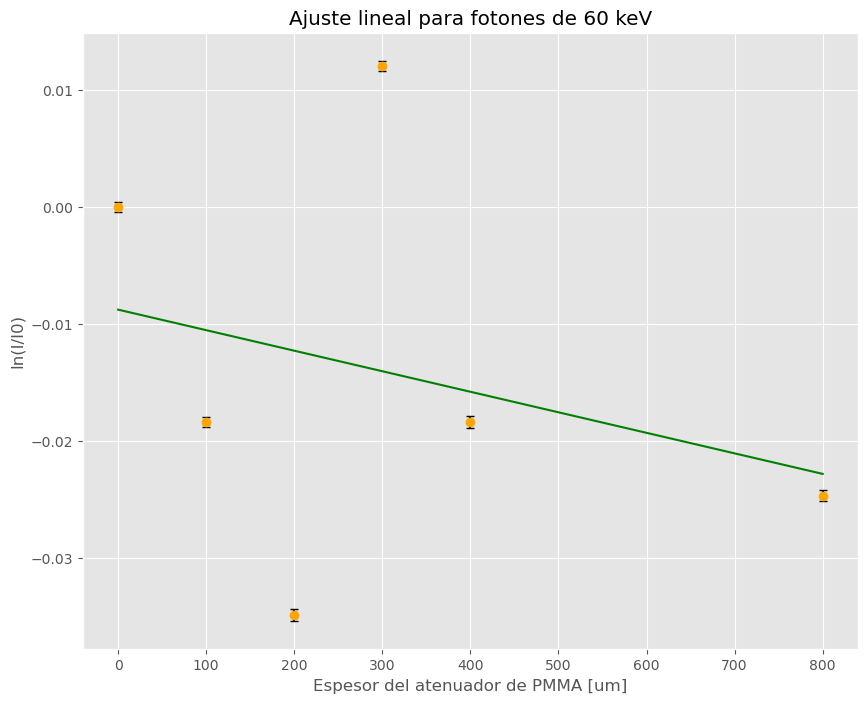

In [68]:
plt.errorbar(x = df_Polietileno['Espesor_de_atenuador_[um]'], y = df_Polietileno['ln(I_60/I0_60)'], yerr = df_Polietileno['E_I_60_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.lineplot(data = df_Polietileno, x = df_Polietileno['Espesor_de_atenuador_[um]'],  y = y_pred_60, color = 'green')
plt.title('Ajuste lineal para fotones de 60 keV')
plt.xlabel('Espesor del atenuador de PMMA [um]')
plt.ylabel('ln(I/I0)')
plt.show()

In [69]:
modelo_lineal_26 = LinearRegression()
X = np.array(df_Polietileno['Espesor_de_atenuador_[um]']).reshape(-1,1) 
modelo_lineal_26.fit(X,df_Polietileno['ln(I_26/I0_26)'])
y_pred_26 = modelo_lineal_26.predict(X)
mu_26 = modelo_lineal_26.coef_
intercept_26 = modelo_lineal_26.intercept_

print(f'La curva ajustada para el Polietileno con una energía incidente de 26 keV es: {mu_26[0]:.4f} * x + {intercept_26:.4f}')

La curva ajustada para el Polietileno con una energía incidente de 26 keV es: -0.0001 * x + 0.0530


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


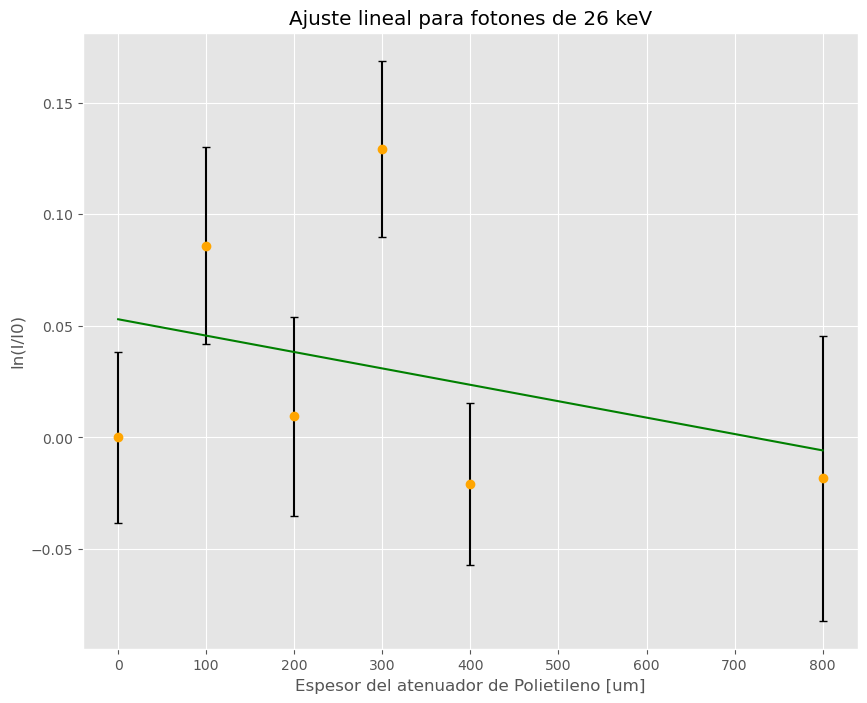

In [70]:
plt.errorbar(x = df_Polietileno['Espesor_de_atenuador_[um]'], y = df_Polietileno['ln(I_26/I0_26)'], yerr = df_Polietileno['E_I_26_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.scatterplot(data = df_Polietileno, x = df_Polietileno['Espesor_de_atenuador_[um]'] , y = df_Polietileno['ln(I_26/I0_26)'], color = 'orange')
sns.lineplot(data = df_Polietileno, x = df_Polietileno['Espesor_de_atenuador_[um]'],  y = y_pred_26, color = 'green')
plt.title('Ajuste lineal para fotones de 26 keV')
plt.xlabel('Espesor del atenuador de Polietileno [um]')
plt.ylabel('ln(I/I0)')
plt.show()

In [71]:
modelo_lineal_14 = LinearRegression()
X = np.array(df_Polietileno['Espesor_de_atenuador_[um]']).reshape(-1,1) 
modelo_lineal_14.fit(X,df_Polietileno['ln(I_14/I0_14)'])
y_pred_14 = modelo_lineal_14.predict(X)
mu_14 = modelo_lineal_14.coef_
intercept_14 = modelo_lineal_14.intercept_

print(f'La curva ajustada para el Polietileno con una energía incidente de 14 keV es: {mu_14[0]:.4f} * x + {intercept_14:.4f}')

La curva ajustada para el Polietileno con una energía incidente de 14 keV es: -0.0001 * x + -0.0071


c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Oli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


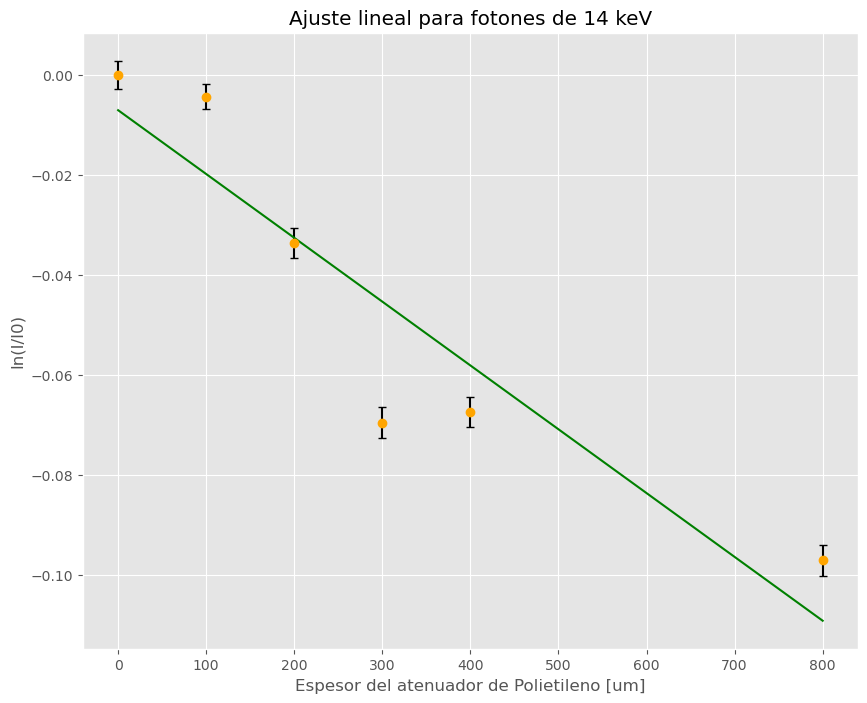

In [72]:
plt.errorbar(x = df_Polietileno['Espesor_de_atenuador_[um]'], y = df_Polietileno['ln(I_14/I0_14)'], yerr = df_Polietileno['E_I_14_keV'], fmt = 'o', color = 'orange', ecolor = 'black', capsize = 3)
sns.scatterplot(data = df_Polietileno, x = df_Polietileno['Espesor_de_atenuador_[um]'] , y = df_Polietileno['ln(I_14/I0_14)'], color = 'orange')
sns.lineplot(data = df_Polietileno, x = df_Polietileno['Espesor_de_atenuador_[um]'],  y = y_pred_14, color = 'green')
plt.title('Ajuste lineal para fotones de 14 keV')
plt.xlabel('Espesor del atenuador de Polietileno [um]')
plt.ylabel('ln(I/I0)')
plt.show()